## Setup

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import plotly.express as px

## Workflow introduction

**1.Visualize the Data**  

Plot the time series to visually inspect the trend and seasonality.
Use tools like the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots to identify patterns.


**2.Assess Stationarity**

Perform statistical tests like the Augmented Dickey-Fuller (ADF) test to check for stationarity.


**3.First Differencing (Remove Trend)**

If a strong trend is present, apply first differencing to remove the trend component.
Inspect the differenced series to see if the trend has been sufficiently removed.

**4.Seasonal Differencing (Remove Seasonality)**

If minor seasonality is present, apply seasonal differencing after first differencing to remove seasonal effects.
The seasonal period should be chosen based on the frequency of the data (e.g., 365 for monthly data with yearly seasonality). If there's visible weekly seasonality, apply seasonal differencing with a lag of 5 (assuming 5 trading days in a week).

**5.Evaluate Residuals**

After differencing, evaluate the residuals to ensure they are stationary.
Use ACF and PACF plots to examine residuals for any remaining patterns.

## Workflow introduction

In [7]:
apple = pd.read_csv(r'C:\Users\12436\Desktop\BrainStation\Capstone project\capstone-Leoyuyuyu\data\OLS_df.csv', index_col=0)
apple = apple[apple.index >= '2010-01-01']
apple.head()

,Adj Close,Volume,Return,Return_tomo
2010-01-01,6.362937,352410800.0,0.000000,0.000000
2010-01-02,6.362937,352410800.0,0.000000,0.000000
2010-01-03,6.362937,352410800.0,0.000000,0.015565
2010-01-04,6.461977,493729600.0,0.015565,0.001729
2010-01-05,6.473148,601904800.0,0.001729,-0.015906


In [8]:
# plot the interactive plot 

figure = px.line(apple, x = apple.index, y= "Return")
figure.update_layout(yaxis_title = "Return",  title = "Daily return of Apple stock from 1980 to 2024")
figure.update_xaxes(rangeslider_visible = True)
figure.show()

To employ the arima model, we use the acf and pacf plots to identify the q and p parameters.

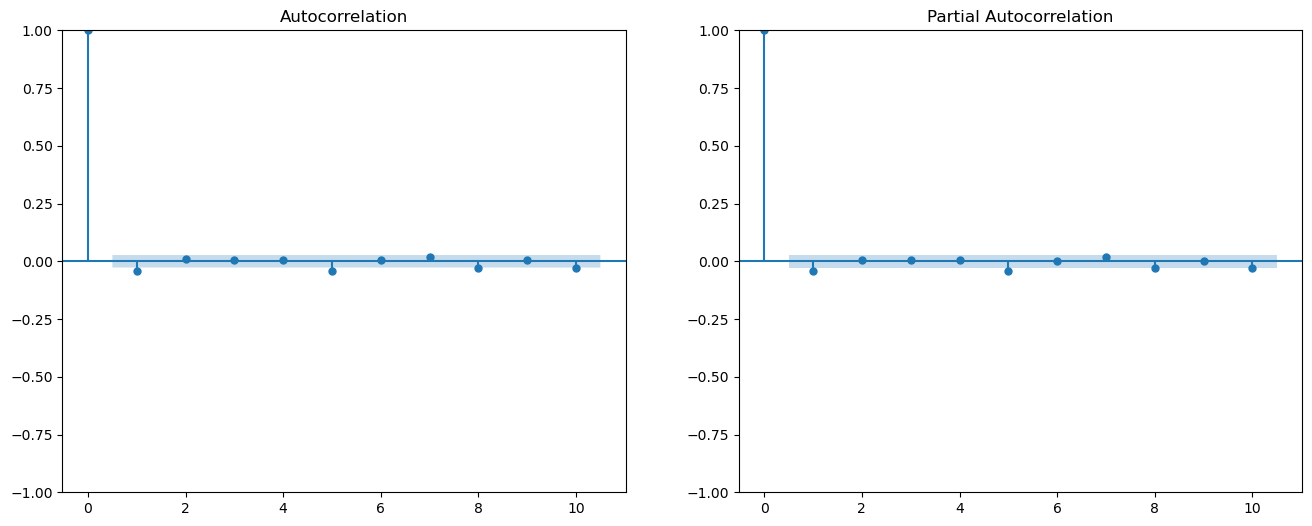

In [13]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(apple['Return'].dropna(), lags=10, ax=axes[0])
plot_pacf(apple['Return'].dropna(), lags=10, ax=axes[1])
plt.show()

In [29]:
train_set = apple.iloc[:int(0.8*len(apple['Return'])),:]
test_set = apple.iloc[int(0.8*len(apple['Return'])):, :]

from statsmodels.tsa.arima.model import ARIMA
# Define the model
model = ARIMA(train_set['Return'], order=(1, 0, 1))
# Fit the model
model_fit = model.fit()
# Print the model summary
print(model_fit.summary())

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                               SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                 4204
Model:                 ARIMA(1, 0, 1)   Log Likelihood               11756.558
Date:                Sun, 16 Jun 2024   AIC                         -23505.115
Time:                        16:32:37   BIC                         -23479.740
Sample:                    01-01-2010   HQIC                        -23496.143
                         - 07-05-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      3.754      0.000       0.000       0.001
ar.L1         -0.3474      0.162     -2.139      0.032      -0.666      -0.029
ma.L1          0.2989      0.164      1.820      0.0

In [30]:
# Make predictions
import numpy as np 
predictions = model_fit.forecast(steps=len(test_set))

# Calculate the errors
mse = mean_squared_error(test_set['Return'], predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.00020326032900927458


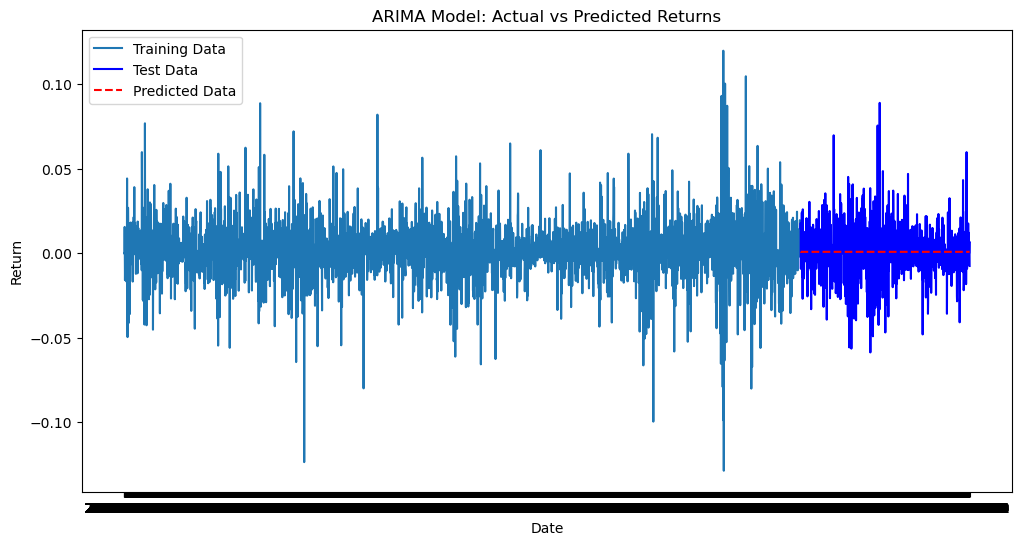

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(train_set.index, train_set['Return'], label='Training Data')
plt.plot(test_set.index, test_set['Return'], label='Test Data', color='blue')
plt.plot(test_set.index, predictions, label='Predicted Data', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('ARIMA Model: Actual vs Predicted Returns')
plt.legend()
plt.show()

### Diagnostics

Check the residuals to ensure they resemble white noise.